In [ ]:
# conda create -n deepface python=3.8
# pip install deepface==0.0.65, matplotlib

# 이미지 정면으로 정렬하기
* 이미 정면인 상태의 이미지는 변화없음

In [ ]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

import matplotlib.pyplot as plt
import numpy as np
import cv2

model = VGGFace.loadModel()
# model = Facenet.loadModel()
# model = OpenFace.loadModel()
# model = FbDeepFace.loadModel()

input_size = model.layers[0].input_shape[1:3]

backends = ["opencv", "ssd", "dlib", "mtcnn"]

img1 = DeepFace.detectFace("aj1.jpg", detector_backend=backends[3])
img2 = DeepFace.detectFace("aj2.png", detector_backend=backends[3])

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 48ms/step
Euclidean distance :  8.474818


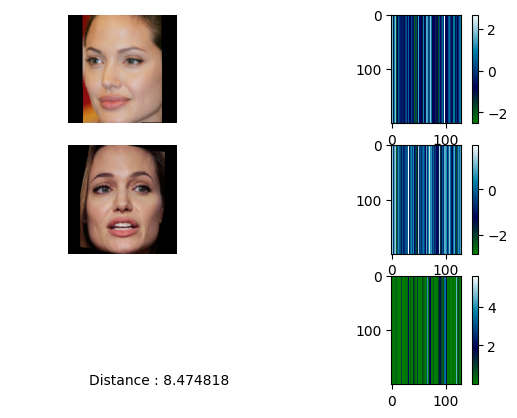

In [10]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

import matplotlib.pyplot as plt
import numpy as np
import cv2

# model = VGGFace.loadModel()
model = Facenet.loadModel()
# model = OpenFace.loadModel()
# model = FbDeepFace.loadModel()

# input_size = model.layers[0].input_shape[1:3]
input_size = model.input_shape[1:3]

backends = ["opencv", "ssd", "dlib", "mtcnn"]

img1 = DeepFace.detectFace("aj1.jpg", detector_backend=backends[3])
img2 = DeepFace.detectFace("aj2.png", detector_backend=backends[3])

# 이미지 리사이징
img1 = cv2.resize(img1, input_size)
img2 = cv2.resize(img2, input_size)

# 학습을 위해 list 를 numpy 배열로 변경
img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)
img1_representation = model.predict(img1)[0, :]
img2_representation = model.predict(img2)[0, :]

# 두이미지에 대한 벡터들의 거리 구하기
distance_vector = np.square(img1_representation - img2_representation)
distance = np.sqrt(distance_vector.sum())
print("Euclidean distance : ", distance)

# 이미지에 대한 백터 히스토그램 형태로 표현
img1_graph = []
img2_graph = []
distance_graph = []
for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)

fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
plt.imshow(img1[0])
plt.axis("off")

ax2 = fig.add_subplot(3, 2, 2)
im = plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3, 2, 3)
plt.imshow(img2[0])
plt.axis("off")

ax4 = fig.add_subplot(3, 2, 4)
im = plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3, 2, 5)
plt.text(0.35, 0, "Distance : %s" % (distance))
plt.axis("off")

ax6 = fig.add_subplot(3, 2, 6)
im = plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()